In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations


In [2]:
#Loading the datasets
df_customer = pd.read_csv('Ecommerce Order Dataset/train/df_Customers.csv')
df_orderitem = pd.read_csv('Ecommerce Order Dataset/train/df_OrderItems.csv')
df_orders = pd.read_csv('Ecommerce Order Dataset/train/df_Orders.csv')
df_Payments = pd.read_csv('Ecommerce Order Dataset/train/df_Payments.csv')
df_Products = pd.read_csv('Ecommerce Order Dataset/train/df_Products.csv')

## Data Understanding
### Customers.csv

In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               89316 non-null  object
 1   customer_zip_code_prefix  89316 non-null  int64 
 2   customer_city             89316 non-null  object
 3   customer_state            89316 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [4]:
df_customer.describe()

,customer_zip_code_prefix
count,89316.000000
mean,40499.471080
std,31194.386361
min,1003.000000
25%,9785.000000
50%,35480.000000
75%,70040.000000
max,99990.000000


In [5]:
df_customer.describe(include=['O'])

,customer_id,customer_city,customer_state
count,89316,89316,89316
unique,89316,3735,27
top,rhevVNXYJnEs,sao paulo,SP
freq,1,14352,37879


### df_orderitem

In [6]:
df_orderitem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          89316 non-null  object 
 1   product_id        89316 non-null  object 
 2   seller_id         89316 non-null  object 
 3   price             89316 non-null  float64
 4   shipping_charges  89316 non-null  float64
dtypes: float64(2), object(3)
memory usage: 3.4+ MB


In [7]:
df_orderitem.describe()

,price,shipping_charges
count,89316.000000,89316.000000
mean,340.900543,44.283210
std,557.459897,37.672491
min,0.850000,0.000000
25%,59.650000,20.110000
50%,136.900000,35.055000
75%,399.200000,57.190000
max,6735.000000,409.680000


In [8]:
df_orderitem.describe(include=['O'])

,order_id,product_id,seller_id
count,89316,89316,89316
unique,89316,27451,2929
top,Xo1fqyXOC6CR,0vbEvli2JYJu,RKad98cTxhSb
freq,1,405,1657


### df_orders

In [9]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       89316 non-null  object
 1   customer_id                    89316 non-null  object
 2   order_status                   89316 non-null  object
 3   order_purchase_timestamp       89316 non-null  object
 4   order_approved_at              89307 non-null  object
 5   order_delivered_timestamp      87427 non-null  object
 6   order_estimated_delivery_date  89316 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


In [10]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
count,89316,89316,89316,89316,89307,87427,89316
unique,89316,89316,7,72775,68215,71143,444
top,Xo1fqyXOC6CR,rhevVNXYJnEs,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-14 12:46:18,2017-12-20
freq,1,1,87428,87,87,87,500


### df_Payments

In [11]:
df_Payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              89316 non-null  object 
 1   payment_sequential    89316 non-null  int64  
 2   payment_type          89316 non-null  object 
 3   payment_installments  89316 non-null  int64  
 4   payment_value         89316 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.4+ MB


In [12]:
df_Payments.describe()

,payment_sequential,payment_installments,payment_value
count,89316.000000,89316.000000,89316.000000
mean,1.099646,2.965717,268.657190
std,0.772658,2.796406,344.409566
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,84.340000
50%,1.000000,2.000000,171.860000
75%,1.000000,4.000000,313.530000
max,29.000000,24.000000,7274.880000


In [13]:
df_Payments.describe(include=['O'])

,order_id,payment_type
count,89316,89316
unique,89316,4
top,Xo1fqyXOC6CR,credit_card
freq,1,65814


### df_Products

In [14]:
df_Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             89316 non-null  object 
 1   product_category_name  89008 non-null  object 
 2   product_weight_g       89301 non-null  float64
 3   product_length_cm      89301 non-null  float64
 4   product_height_cm      89301 non-null  float64
 5   product_width_cm       89301 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.1+ MB


In [15]:
df_Products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,89301.000000,89301.000000,89301.000000,89301.00000
mean,2087.068129,30.220658,16.559423,23.03421
std,3747.039215,16.110199,13.388514,11.68828
min,0.000000,7.000000,2.000000,6.00000
25%,300.000000,18.000000,8.000000,15.00000
50%,700.000000,25.000000,13.000000,20.00000
75%,1800.000000,38.000000,20.000000,30.00000
max,40425.000000,105.000000,105.000000,118.00000


In [16]:
df_Products.describe(include=['O'])

,product_id,product_category_name
count,89316,89008
unique,27451,70
top,0vbEvli2JYJu,toys
freq,405,67027


## Data Cleaning

In [17]:
def order_wrangler(df):
    """
    Cleans and processes df_orders by converting date columns to datetime format 
    and generating new time-based features.

    Returns:
    pd.DataFrame: A DataFrame with the following new columns:
        - approval_delay: Time taken (in hours) between order placement and approval.
        - delivery_time: Time taken (in days) from order placement to actual delivery.
        - estimated_delivery_days: Estimated delivery time (in days) from order placement.
        - delay_flag: Binary flag (1 = Delayed, 0 = On-time) indicating whether the delivery exceeded the estimated date.
    """

    # Convert to datetime format
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')
    df['order_approved_at'] = pd.to_datetime(df['order_approved_at'], errors='coerce')
    df['order_delivered_timestamp'] = pd.to_datetime(df['order_delivered_timestamp'], errors='coerce')
    df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], errors='coerce')

    # Create new time-based features
    df['approval_delay'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.total_seconds() / 3600  # Hours
    df['delivery_time'] = (df['order_delivered_timestamp'] - df['order_purchase_timestamp']).dt.days  # Days
    df['estimated_delivery_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days  # Days
    df['delay_flag'] = (df['order_delivered_timestamp'] > df['order_estimated_delivery_date']).astype(int)  # 1 if delayed, 0 otherwise

    # Return the selected columns
    return df[['order_id', 'customer_id','approval_delay', 'delivery_time', 'estimated_delivery_days', 'delay_flag']]


In [18]:
df_orders_cleaned = order_wrangler(df_orders)
df_orders_cleaned.head()

,order_id,customer_id,approval_delay,delivery_time,estimated_delivery_days,delay_flag
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,0.271944,4.0,17,0
1,v6px92oS8cLG,PxA7fv9spyhx,0.663611,13.0,33,0
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,23.934444,10.0,19,0
3,bwJVWupf2keN,EOEsCQ6QlpIg,0.179722,9.0,31,0
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,0.790833,14.0,26,0


In [19]:
def products_wrangler(df):
    """
    Cleans and processes the products dataset by calculating product size (volume) and filtering out rows with missing values.

    Parameters:
    df (pd.DataFrame): DataFrame containing product details.

    Returns:
    pd.DataFrame: A DataFrame with the following new column:
        - product_volume_cm3: Computed as (length * width * height).
    """

    # Drop rows with missing values in relevant columns
    df = df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])

    # Compute product volume (cubic cm)
    df['product_volume_cm3'] = df['product_length_cm'] * df['product_width_cm'] * df['product_height_cm']

    # Return the relevant columns
    return df[['product_id', 'product_weight_g', 'product_volume_cm3']]


In [20]:
df_Products_cleaned = products_wrangler(df_Products)
print(df_Products_cleaned.shape)
print(df_Products_cleaned.head())

(89301, 3)
     product_id  product_weight_g  product_volume_cm3
0  90K0C1fIyQUf             491.0              3648.0
1  qejhpMGGVcsl             440.0              4284.0
2  qUS5d2pEAyxJ            2200.0              4096.0
3  639iGvMyv0De            1450.0              9792.0
4  1lycYGcsic2F             300.0               816.0


C:\Users\Hp\AppData\Local\Temp\ipykernel_20804\460139524.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_volume_cm3'] = df['product_length_cm'] * df['product_width_cm'] * df['product_height_cm']


In [28]:
df_Products_cleaned['product_id'].duplicated().sum()

np.int64(61852)

In [21]:
def orderitem_wrangler(df):
    """
    Cleans and processes the order items dataset by selecting relevant columns and removing missing values.

    Parameters:
    df (pd.DataFrame): DataFrame containing order item details.

    Returns:
    pd.DataFrame: A cleaned DataFrame with the following columns:
        - order_id
        - product_id
        - price
        - shipping_charges
    """

    # Select the required columns and drop rows with missing values
    df_cleaned = df[['order_id', 'product_id', 'price', 'shipping_charges']].dropna().copy()

    return df_cleaned


In [22]:
print(orderitem_wrangler(df_orderitem).shape)
orderitem_wrangler(df_orderitem).head()

(89316, 4)


,order_id,product_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,779.90,30.66


In [29]:
def create_combined_dataset(df_orders, df_orderitems, df_products):
    df_orders_cleaned = order_wrangler(df_orders)
    df_orderitems_cleaned = orderitem_wrangler(df_orderitems)
    df_products_cleaned = products_wrangler(df_products)

    # Drop duplicates if needed
    df_products_cleaned = df_products_cleaned.drop_duplicates(subset='product_id')

    # Merge orders with order items on 'order_id'
    df_merged = pd.merge(df_orders_cleaned, df_orderitems_cleaned, on='order_id', how='inner')
    print(f"shape for df_merges: {df_merged.shape}")

    # Merge with products dataset on 'product_id'
    df_final = pd.merge(df_merged, df_products_cleaned, on='product_id', how='inner')
    print(f'Shape for df_final: {df_final.shape}')

    return df_final


In [30]:
train_df = create_combined_dataset(df_orders=df_orders, df_orderitems=df_orderitem,df_products=df_Products)

C:\Users\Hp\AppData\Local\Temp\ipykernel_20804\460139524.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_volume_cm3'] = df['product_length_cm'] * df['product_width_cm'] * df['product_height_cm']


shape for df_merges: (89316, 9)
Shape for df_final: (89301, 11)


In [31]:
print(train_df.shape)
train_df.sample(5)

(89301, 11)


,order_id,customer_id,approval_delay,delivery_time,estimated_delivery_days,delay_flag,product_id,price,shipping_charges,product_weight_g,product_volume_cm3
69717,Qes3SVLM9AlK,zC5ciPFuA9cL,0.199722,10.0,23,0,nXZPk6g0AKxS,4590.00,11.73,450.0,561.0
54132,YmnYTdpA8CG0,mRN8z4gfmuKL,0.292778,3.0,22,0,YzmMZTj1bDXk,399.20,47.55,150.0,4913.0
7060,a6bglILq63bu,I3uGJhXSrLB4,0.264722,6.0,23,0,v5nCR4cuovu9,111.27,27.26,600.0,2560.0
44398,W0YPcnyAvyLr,u1ae5kbqQKsY,0.207222,44.0,23,1,KPXWPJnBSXkr,26.20,88.21,500.0,5859.0
22294,XB2KS7Ef3Vib,rHu4jkrEzQNb,0.281944,1.0,21,0,wEXYeIBMtNpz,71.80,18.40,1700.0,19500.0


### Univariate Analysis

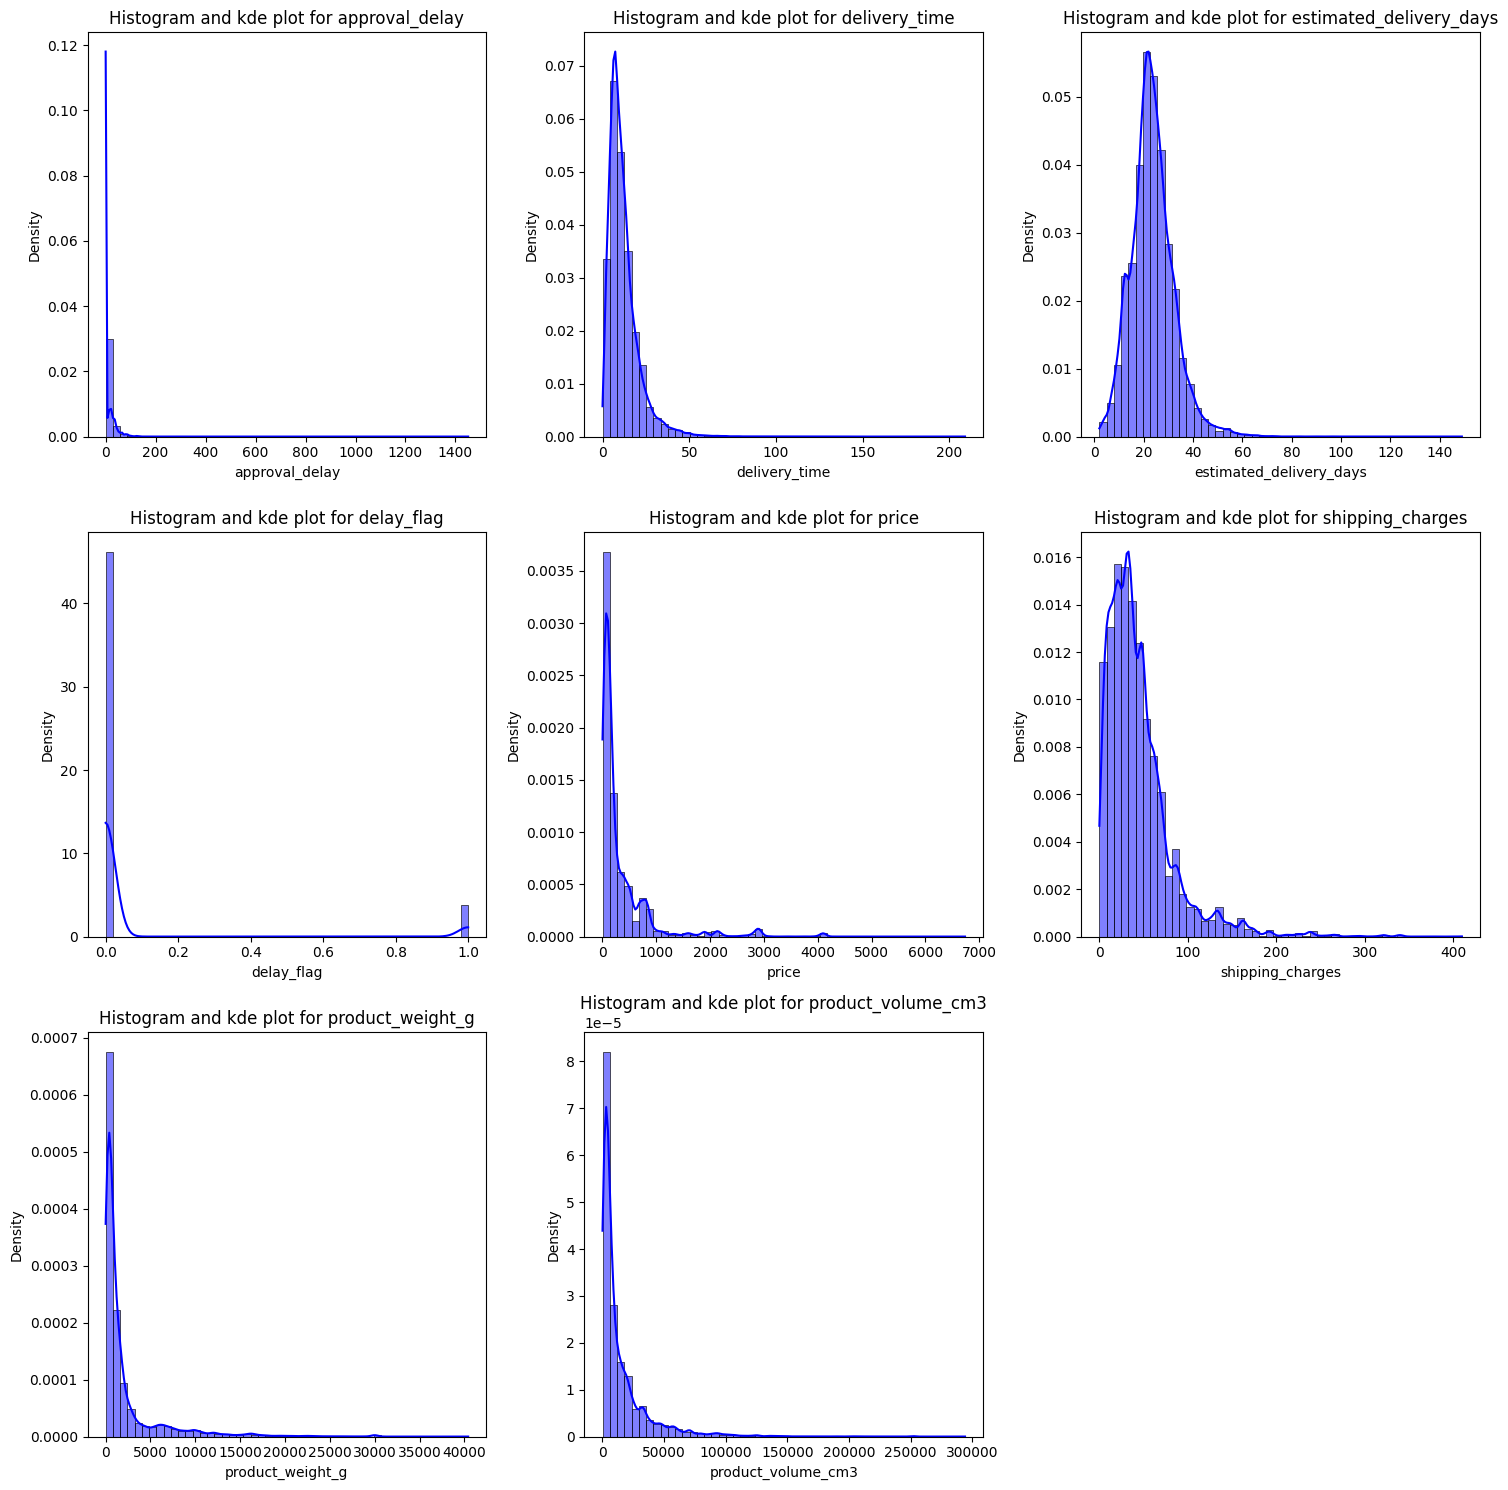

In [49]:
ncols = 3
nrows = (len(train_df.select_dtypes(include=['number']).columns)+ncols-1)//ncols

fig, axes = plt.subplots(nrows, ncols, figsize = (5*ncols, 5*nrows))

axes = axes.flatten()

for i, col in enumerate(train_df.select_dtypes(include=['number']).columns):
  sns.histplot(data=train_df, x = col, kde=True, bins= 50, color='blue', stat='density', ax=axes[i])
  axes[i].set_title(f"Histogram and kde plot for {col}")
  axes[i].set_ylabel("Density")

# removing any empty slots
for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Bivariate Analysis

In [ ]:
numerinc_columns = train_df.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = (len(numerinc_columns)+n_cols - 1)// n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize = (5*nrows, 5*n_cols))

axes = axes.flatten()

for i 


In [58]:
col1,col2 = combinations(numerinc_columns, 2)[0]
print(col1, col2)

TypeError: 'itertools.combinations' object is not subscriptable